# Problem Set 8

# MACS 30150, Dr. Evans

## Submitted by- Nipun Thakurele

## Problem 1

In [135]:
import numpy as np
import pandas as pd

## Problem 1(a)

In [136]:
url_1 = ('https://raw.githubusercontent.com/nt546/persp-model-econ_W19/master/ProblemSets/PS8/biden.csv')
biden_df = pd.read_csv(url_1)
biden_df = biden_df.dropna()
print(biden_df.shape)
print(biden_df.head())

X = biden_df[['female', 'age', 'educ', 'dem', 'rep']].values
y = biden_df['biden'].values

(1807, 6)
   biden  female  age  educ  dem  rep
0     90       0   19    12    1    0
1     70       1   51    14    1    0
2     60       0   27    14    0    0
3     50       1   43    14    1    0
4     60       1   38    14    0    1


In [137]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=25)
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

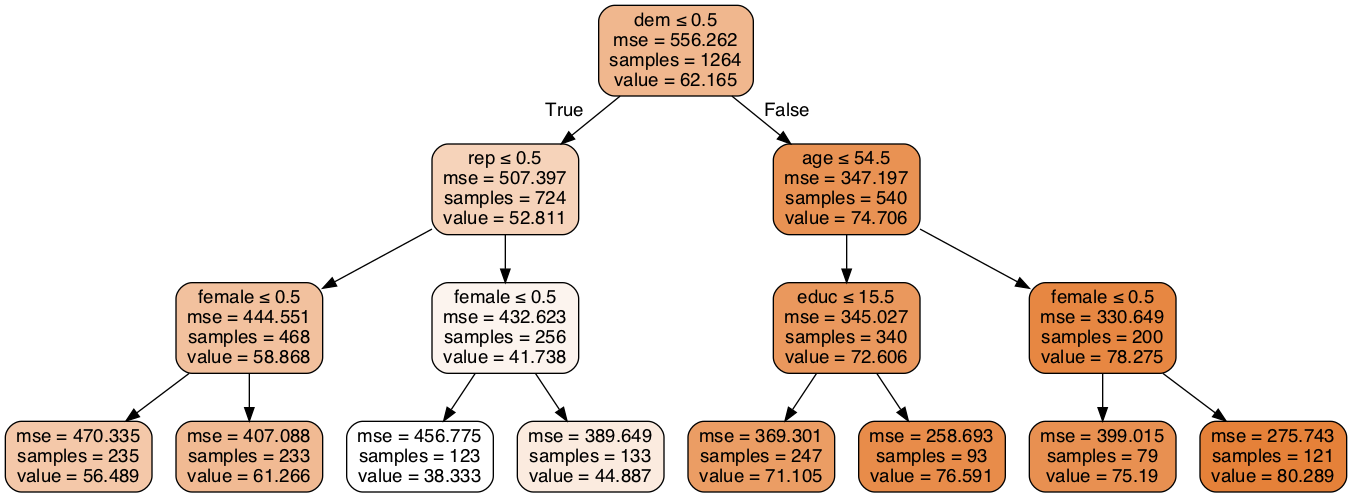

In [138]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(biden_tree, out_file=dot_data,
                feature_names=biden_df.columns[1:],
                class_names=biden_df.columns[0],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Interpretation

The root node is democrat variable, which splits in two decision trees based on whether a person is democrat
or not. If a person is not a democrat then s/he gets on the left branch which further splits based on whether a person
is a republican or not. If s/he is a republican then s/he is again on left branch of the tree and it finally splits into
two based on the gender of the respondent. On the right hand side, after democrat variable, the tree splits intot two
depending upon whether the age of the respondent is less than or equal to 54.5 and education further splits the left tree
of the corresponding branch. If the respondent's age is more than 54.5 then the decision making variable is gender, instead
 of education. This particular decision tree minimizes the "biden" prediction error and was formed with max_depth = 3
and min_samples_leaf = 5

In [139]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 396.1937146321307


### The test MSE is 396.19

## Problem 1(b)

In [140]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# specify parameters and distributions to sample from
param_dist1 = {'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

biden_tree2 = DecisionTreeRegressor()

# Run randomized hyperparameter search
random_search1 = \
    RandomizedSearchCV(biden_tree2, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search1.fit(X, y)
print('RandBestEstimator1=', random_search1.best_estimator_, "\n")
print('RandBestParams1=', random_search1.best_params_, "\n")
print('RandBestScore1=', -random_search1.best_score_, "\n")

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14} 

RandBestScore1= 401.6903602232667 



## Problem 1(c)

In [141]:
# specify parameters and distributions to sample from
param_dist2 = { 'n_estimators': [10, 200],
                'max_depth': [3, 10],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 5)}

from sklearn.ensemble import RandomForestRegressor
biden_tree3 = RandomForestRegressor(bootstrap=True,oob_score=True, random_state=25)

# Run randomized hyperparameter search
random_search2 = \
    RandomizedSearchCV(biden_tree3, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search2.fit(X, y)
print('RandBestEstimator2=', random_search2.best_estimator_, "\n")
print('RandBestParams2=', random_search2.best_params_, "\n")
print('RandBestScore2=', -random_search2.best_score_)


RandBestEstimator2= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=True, random_state=25,
           verbose=0, warm_start=False) 

RandBestParams2= {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10} 

RandBestScore2= 397.0681090117028


## Problem 2

In [142]:
import numpy as np
import pandas as pd

In [143]:
url_2 = 'https://raw.githubusercontent.com/nt546/persp-model-econ_W19/master/ProblemSets/PS8/Auto.csv'

auto_df = pd.read_csv(url_2, na_values=['?'])
auto_df = auto_df.dropna()

print(auto_df.shape)
print(auto_df.head())

(392, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [144]:
auto_df['mpg_high'] = np.where(auto_df['mpg']>=np.median(auto_df['mpg']), 1, 0)
auto_df.head()
auto_df['const'] = 1
auto_df['origin1'] = (auto_df['origin'] == 1).astype(int)
auto_df['origin2'] = (auto_df['origin'] == 2).astype(int)

## Problem 2(a)

In [145]:
X = auto_df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year',\
             'origin1', 'origin2']].values
y = auto_df['mpg_high'].values

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

k = 4
kf_log = KFold(n_splits=k, shuffle=True, random_state=25)
kf_log.get_n_splits(X)

MSE_vec_kf = np.zeros(k)

false_neg = np.zeros(k)
false_pos = np.zeros(k)

k = 0

for train_index, test_index in kf_log.split(X):
    print('k index=', k)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    confusion = confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    sensitivity = TP / float(FN + TP)
    false_neg[k] = (1 - sensitivity)*100 # false negative
    specificity = TN / (TN + FP)
    false_pos[k] = (1 - specificity)*100 # false positive

    MSE_vec_kf[k] = ((y_test - y_pred) ** 2).mean()
    
    k += 1

print("\n")
print('Average MSE across k = 4 is', MSE_vec_kf.mean())
print('Average error rate for category where mpg_high == 0 is', false_pos.mean(), '%')
print('Average error rate for category where mpg_high == 1 is', false_neg.mean(), '%')

k index= 0
k index= 1
k index= 2
k index= 3


Average MSE across k = 4 is 0.09948979591836735
Average error rate for category where mpg_high == 0 is 11.93288810332874 %
Average error rate for category where mpg_high == 1 is 7.794684205076571 %


## Problem 2(b)

In [147]:
from sklearn.ensemble import RandomForestClassifier

X = auto_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin1', 'origin2']].values
y = auto_df['mpg_high'].values

# specify parameters and distributions to sample from
param_dist3 = { 'n_estimators': [10, 200],
                'max_depth': [3, 8],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 8)}

mpg_tree = RandomForestClassifier(bootstrap=True, oob_score=True, random_state=25)

# Run randomized hyperparameter search
random_search3 = \
    RandomizedSearchCV(mpg_tree, param_distributions=param_dist3,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

random_search3.fit(X, y)
print('RandBestEstimator3=', random_search3.best_estimator_, "\n")
print('RandBestParams3=', random_search3.best_params_, "\n")
print('RandBestScore3=', -random_search3.best_score_, "\n")



RandBestEstimator3= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=25, verbose=0, warm_start=False) 

RandBestParams3= {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10} 

RandBestScore3= 0.08928571428571429 



## Problem 2(c)

In [148]:
from sklearn.svm import SVC

# specify parameters and distributions to sample from
param_dist4 = { 'C': sp_uniform(loc=0.2, scale=4.0),
               'gamma': ['scale', 'auto'],
                'shrinking': [True, False]
                }

mpg_tree2 = SVC(kernel='rbf')


# Run randomized hyperparameter search
random_search4 = \
    RandomizedSearchCV(mpg_tree2, param_distributions=param_dist4,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

random_search4.fit(X, y)
print('RandBestEstimator4=', random_search4.best_estimator_, "\n")
print('RandBestParams4=', random_search4.best_params_, "\n")
print('RandBestScore4=', -random_search4.best_score_, "\n")

RandBestEstimator4= SVC(C=1.8094629152568114, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False) 

RandBestParams4= {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False} 

RandBestScore4= 0.11479591836734694 



## Problem 2(d)

The MSE of the above three models: <br>
    part(a) is 0.099, <br>
    part(b) is 0.089, <br>
    and part(c) is 0.114 <br>
    
Hence, part(b) that is, RandomForestClassifier is the best predictor of mpg_high as it has the lowest MSE.